In [18]:
# Importe as bibliotecas necessárias
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [10]:

# Conectar ao banco de dados
conn = sqlite3.connect('dados_formulario.db')

# Consultar todos os registros da tabela 'formulario'
query = "SELECT * FROM formulario"
df = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()

# Mostrar o DataFrame
df.head(5)  # Mostrar os primeiros 40 registros

,id,descricao_mercadoria,pais_origem,valor_fob,peso_bruto,nome_exportador,codigo_ncm,quantidade,nome_importador,modo_importacao,pais_procedencia,unidade_medida
0,1,peça de carro byd,china,100.000000,10.000000,byd,928211,2.0,byd brasil,maritimo,china,kg
1,2,bslth produto,Brasil,53.557979,15.832081,EmpresaA,142623,10.0,EmpresaB,maritimo,China,tonelada
2,3,yauyx produto,Brasil,118.791302,8.975277,EmpresaA,921844,7.0,EmpresaB,maritimo,China,tonelada
3,4,vgohl produto,Brasil,83.310344,15.355308,EmpresaA,324260,10.0,EmpresaB,maritimo,China,tonelada
4,5,qdopx produto,Brasil,86.560888,7.296491,EmpresaA,398279,7.0,EmpresaB,maritimo,China,kg


In [23]:
# Conectar ao banco de dados
conn = sqlite3.connect('dados_formulario.db')

# Consultar todos os registros da tabela 'formulario'
query = "SELECT * FROM formulario"
df = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()

# Selecionar os atributos para treinamento
atributos = ['descricao_mercadoria', 'pais_origem', 'nome_exportador',
             'nome_importador', 'modo_importacao', 'pais_procedencia', 'unidade_medida']

X = df[atributos]
y = df['codigo_ncm']

# Converter variáveis categóricas em numéricas (se necessário)
X = pd.get_dummies(X)

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Criar e treinar o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

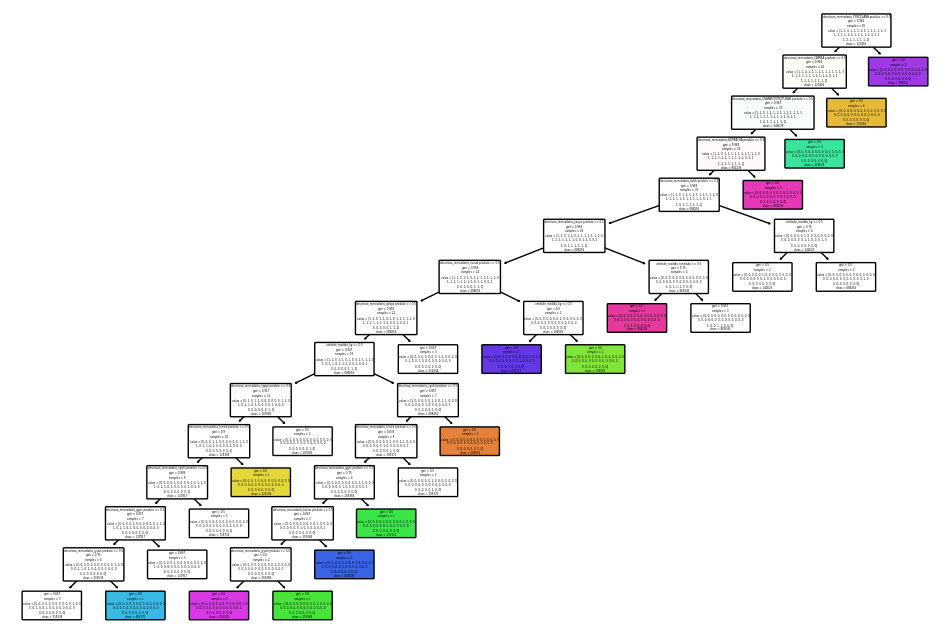

In [26]:
# Plotar a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=list(map(str, modelo_arvore.classes_)), filled=True, rounded=True)
plt.show()